In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils import *
from rulebased_classifier import RuleBasedClassifier

In [2]:
with open("wdbc.pkl", "rb") as f: 
    patient_df = pickle.load(f)

print(type(patient_df)) 
print(patient_df.shape) 


<class 'pandas.core.frame.DataFrame'>
(569, 32)


<Axes: xlabel='malignant'>

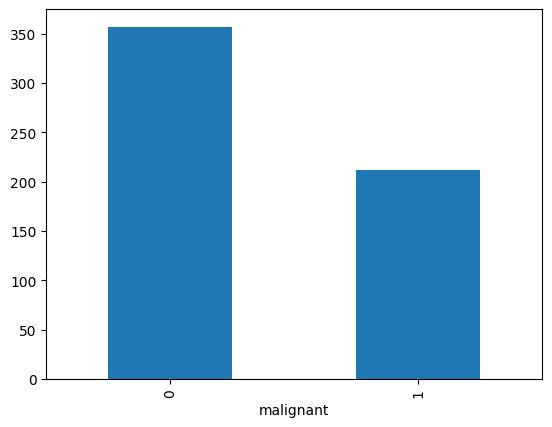

In [3]:
patient_df['malignant'].value_counts().plot(kind='bar')

In [4]:
patient_df.columns

Index(['id', 'malignant', 'radius_0', 'texture_0', 'perimeter_0', 'area_0',
       'smoothness_0', 'compactness_0', 'concavity_0', 'concave points_0',
       'symmetry_0', 'fractal dimension_0', 'radius_1', 'texture_1',
       'perimeter_1', 'area_1', 'smoothness_1', 'compactness_1', 'concavity_1',
       'concave points_1', 'symmetry_1', 'fractal dimension_1', 'radius_2',
       'texture_2', 'perimeter_2', 'area_2', 'smoothness_2', 'compactness_2',
       'concavity_2', 'concave points_2', 'symmetry_2', 'fractal dimension_2'],
      dtype='object')

    a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values) : Measures how intensity (brightness) varies across the nucleus in an image.
	c) perimeter : Measures the total boundary length of the nucleus.
	d) area : A larger area suggests an abnormally growing cell (common in cancerous cells)
	e) smoothness (local variation in radius lengths) : A high smoothness value means a more uniform shape, while a low smoothness value means the edges are highly irregular.
	f) compactness (perimeter^2 / area - 1.0) : Higher compactness suggests an irregular or elongated shape, which is more common in cancerous cells.
	g) concavity (severity of concave portions of the contour) : Higher concavity means the nucleus has deeper and more severe indentations 
	h) concave points (number of concave portions of the contour) : More concave points suggest irregular growth patterns, often seen in cancerous cells.
	i) symmetry : Normal cells tend to be highly symmetrical, while cancerous cells often exhibit asymmetry.
	j) fractal dimension ("coastline approximation" - 1) : A higher fractal dimension suggests a more complex, irregular shape

| **Feature**           | **What It Measures**           | **Normal Cell Behavior**   | **Cancerous Cell Behavior**   |
|----------------------|-----------------------------|--------------------------|-----------------------------|
| **Radius**           | Size of the nucleus         | Small, uniform          | Larger, irregular         |
| **Texture**         | Variation in brightness      | Smooth intensity        | High variability          |
| **Perimeter**       | Length of boundary          | Shorter, round shape    | Longer, irregular shape   |
| **Area**            | Total size                   | Smaller                 | Larger                    |
| **Smoothness**      | Edge uniformity             | Smooth                  | Irregular edges           |
| **Compactness**     | Shape density               | Dense, circular         | More stretched or jagged  |
| **Concavity**       | Depth of inward curves      | Few or none             | Deep indentations         |
| **Concave Points**  | Number of inward curves     | Few                     | Many                      |
| **Symmetry**        | Balance of shape            | Symmetrical             | Asymmetrical              |
| **Fractal Dimension** | Irregularity of edges     | Low                     | High                      |


size = area, perimeter, radius
shape = smoothness, concavity, concave points
texture = texture
homog = symmetry

In [5]:
patient_df = patient_df.drop(['id'], axis=1)
patient_X, patient_y = patient_df.drop(['malignant'], axis=1), patient_df['malignant']
patient_X, patient_X_test, patient_y, patient_y_test = train_test_split(patient_X, patient_y, test_size=0.1, random_state=42)

patient_X_train, patient_X_val, patient_y_train, patient_y_val = train_test_split(patient_X, patient_y, test_size=0.2, random_state=42)

patient_df_train = pd.concat([patient_X_train, patient_y_train], axis=1)
patient_df_val = pd.concat([patient_X_val, patient_y_val], axis=1)
patient_test = pd.concat([patient_X_test, patient_y_test], axis=1)


In [6]:
patient_df_train[patient_df_train['malignant'] == 1].describe()

,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,symmetry_0,fractal dimension_0,...,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2,malignant
count,157.000000,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0
mean,17.390000,21.63414,114.756051,972.975796,0.102654,0.142108,0.157132,0.085974,0.192624,0.062374,...,29.475478,140.734459,1418.735032,0.145062,0.370883,0.443564,0.180260,0.325161,0.091206,1.0
std,3.249356,3.73414,21.970593,377.569459,0.012346,0.050959,0.070324,0.032712,0.026972,0.007683,...,5.526582,29.848176,625.083246,0.022514,0.167434,0.177558,0.046074,0.074579,0.022130,0.0
min,10.950000,14.34000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,0.049960,...,16.670000,87.220000,508.100000,0.093870,0.051310,0.023980,0.028990,0.156500,0.055040,1.0
25%,15.060000,19.08000,98.780000,705.600000,0.093840,0.109800,0.108500,0.063670,0.176100,0.056360,...,25.840000,118.600000,939.700000,0.130600,0.244400,0.324100,0.152100,0.280900,0.076230,1.0
50%,17.290000,21.08000,113.400000,928.800000,0.102500,0.131800,0.150800,0.086240,0.189600,0.061250,...,28.650000,137.900000,1304.000000,0.141900,0.357800,0.402300,0.177700,0.313800,0.088150,1.0
75%,19.530000,23.56000,129.100000,1191.000000,0.111000,0.166600,0.197400,0.101500,0.209500,0.066730,...,32.090000,156.100000,1671.000000,0.156300,0.446200,0.535500,0.210200,0.361300,0.102400,1.0
max,28.110000,39.28000,188.500000,2501.000000,0.142500,0.311400,0.426400,0.191300,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500,1.0


In [7]:
patient_df_train[patient_df_train['malignant'] == 0].describe()

,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,symmetry_0,fractal dimension_0,...,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2,malignant
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.0
mean,12.148302,17.968849,78.041270,463.019048,0.091770,0.078916,0.043752,0.024580,0.173232,0.062625,...,23.537262,87.140159,560.555556,0.123720,0.179792,0.160684,0.072662,0.269610,0.078899,0.0
std,1.803572,3.978603,11.971817,135.938608,0.013538,0.033735,0.037236,0.015452,0.024603,0.006437,...,5.365740,13.848559,166.928173,0.020108,0.092387,0.137743,0.036913,0.041281,0.013555,0.0
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,0.052340,...,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156600,0.056950,0.0
25%,11.040000,15.172500,70.620000,372.700000,0.082715,0.054125,0.019962,0.013678,0.157975,0.058332,...,19.687500,77.995000,441.100000,0.109675,0.110900,0.071830,0.047713,0.242625,0.069953,0.0
50%,12.260000,17.460000,78.300000,462.150000,0.090485,0.074925,0.036985,0.022760,0.170800,0.061695,...,22.775000,86.685000,549.850000,0.123400,0.167150,0.139800,0.071450,0.269250,0.076910,0.0
75%,13.412500,19.902500,85.912500,552.675000,0.100425,0.097227,0.059010,0.031753,0.187425,0.065697,...,26.780000,97.287500,675.350000,0.135850,0.223200,0.209225,0.098240,0.297625,0.084723,0.0
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.313000,0.085340,0.274300,0.095750,...,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600,0.0


# Task 1

In [8]:
size = ['area', 'perimeter', 'radius']
shape = ['smoothness', 'concavity', 'concave points']
texture = ['texture']
homog = ['symmetry', 'fractal dimension']
C = RuleBasedClassifier( size, shape, texture, homog, decision_option="all")

In [9]:
C.fit(patient_X_train, patient_y_train)

In [10]:
C.score(patient_X_val, patient_y_val)

(0.8640776699029126,
 0.7727272727272727,
 0.8947368421052632,
 0.8292682926829269,
 array([[55, 10],
        [ 4, 34]]))